In [30]:
from sklearn import datasets
import numpy as np

In [31]:
# get the Iris dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set

iris = datasets.load_iris()
X = iris.data[:100, [2,3]] # just select the first 100 entries (corresponding two different flowers) & 2 features (petal length / width)
y = iris.target
y = y[(y==0) | (y==1)] # get the corresponding labels to our petal lengths / widths

In [32]:
# create Train and Test data

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [33]:
# standardize data 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [35]:
knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski') # minkowsi is the generalization of euclidean distance
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [36]:
from mlxtend.plotting import plot_decision_regions

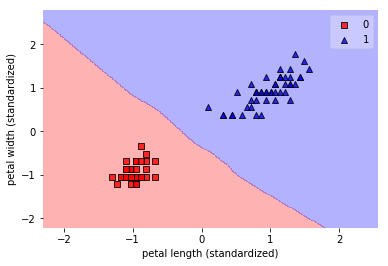

In [39]:
# get combined datasets
X_combined = np.vstack((X_train, X_test))
X_combined_std = sc.transform(X_combined)
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=knn)
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.show()
# 0 = I. setosa   1 = I. versicolor

In [65]:
x1_min, x1_max = X_combined_std[:, 0].min() - 1, X_combined_std[:, 0].max() + 1
x2_min, x2_max = X_combined_std[:, 1].min() - 1, X_combined_std[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.4),
                       np.arange(x2_min, x2_max, 0.4))

Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

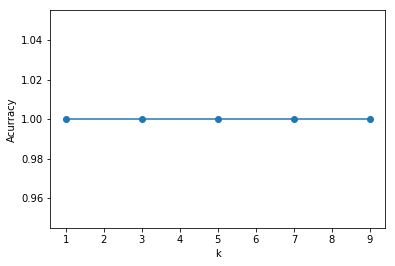

In [38]:
accuracy = []

for k in range(1,11,2):
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski') 
    knn.fit(X_train_std, y_train)
    accuracy.append(knn.score(X = X_test_std, y = y_test))

plt.plot(range(1,11, 2), accuracy, marker='o')
plt.xlabel('k')
plt.ylabel('Acurracy')
plt.show()